In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def public_dir(iterable):
    return [x for x in dir(iterable) if not x.startswith("_")]

In [3]:
solution = ct.Solution("species.yaml")
aliases = {"C6H11NO": "CHO", "HNO3": "nitric_acid", "H2O": "water", "C6H10O": "CH"}
for name, alias in aliases.items():
    solution.add_species_alias(name, alias)

In [4]:
solution.TPX = 1000, 10*ct.one_atm, {"CHO": 1, "nitric_acid": 3, "water": 1}

In [5]:
reactor = ct.ConstPressureReactor(solution)
sim = ct.ReactorNet([reactor])
sim.verbose = True

In [6]:
states = ct.SolutionArray(solution, extra=["t", "rate"])

In [7]:
for dt in range(1000):
    t = sim.time + 10
    sim.advance(t)
    states.append(reactor.thermo.state, t=t, rate=reactor.kinetics.forward_rate_constants)

Initializing reactor network.
Reactor 0: 7 variables.
              0 sensitivity params.
Number of equations: 7
Maximum time step:                0


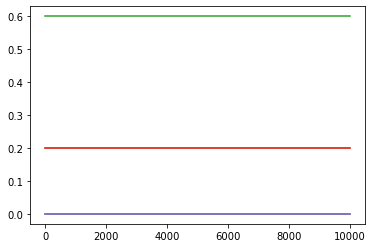

In [8]:
plt.plot(states.t, states.X)

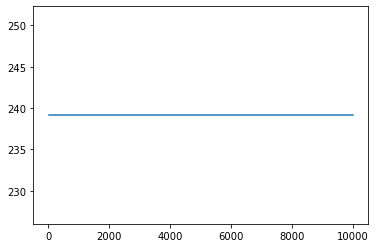

In [9]:
plt.plot(states.t, states.rate)